# Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Load data and wrangle (parts 1-4)

In [2]:
df_mut = pd.read_csv('https://www.dropbox.com/s/g47l2r2kmjfzst2/aau1043_dnm.tsv?dl=1')
df_age = pd.read_csv('https://www.dropbox.com/s/vxc4tw1qv7j4s4h/aau1043_parental_age.tsv?dl=1', index_col='Proband_id')

df_mut

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [3]:
df_age

,Father_age,Mother_age
Proband_id,,
675,31,36
1097,19,19
1230,30,28
1481,32,20
1806,38,34
...,...,...
153657,27,23
154565,36,30
154621,19,18


In [4]:
df_mut['pat_dnm'] = (df_mut['Phase_combined'] == 'father').astype(int)
df_mut['mat_dnm'] = (df_mut['Phase_combined'] == 'mother').astype(int)
df_mut['tot_dnm'] = 1

df_mut

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger,pat_dnm,mat_dnm,tot_dnm
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed,1,0,1
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed,1,0,1
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed,0,1,1
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed,1,0,1
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN,1,0,1
26427,chr9,137396508,C,T,39729,father,NaN,NaN,1,0,1
26428,chr9,137633973,C,A,17904,mother,NaN,NaN,0,1,1
26429,chr9,137889777,G,A,80108,father,NaN,NaN,1,0,1


In [5]:
df_mut = df_mut.groupby('Proband_id').sum()
df_mut = df_mut.drop('Pos', axis=1)

df_mut

,pat_dnm,mat_dnm,tot_dnm
Proband_id,,,
675,51,19,70
1097,26,12,39
1230,42,12,57
1481,53,14,68
1806,61,11,78
...,...,...,...
153657,41,8,49
154565,61,14,75
154621,39,11,50


In [6]:
df = df_mut.join(df_age)
df

,pat_dnm,mat_dnm,tot_dnm,Father_age,Mother_age
Proband_id,,,,,
675,51,19,70,31,36
1097,26,12,39,19,19
1230,42,12,57,30,28
1481,53,14,68,32,20
1806,61,11,78,38,34
...,...,...,...,...,...
153657,41,8,49,27,23
154565,61,14,75,36,30
154621,39,11,50,19,18


# Analysis

## Graphing (part 5)

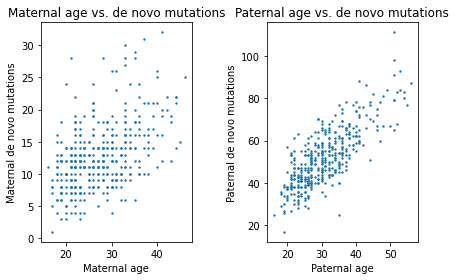

In [7]:
fig, axs = plt.subplots(ncols=2)
axs[0].scatter(df['Mother_age'], df['mat_dnm'], s=2)
axs[0].set_title('Maternal age vs. de novo mutations')
axs[0].set_xlabel('Maternal age')
axs[0].set_ylabel('Maternal de novo mutations')

axs[1].scatter(df['Father_age'], df['pat_dnm'], s=2)
axs[1].set_title('Paternal age vs. de novo mutations')
axs[1].set_xlabel('Paternal age')
axs[1].set_ylabel('Paternal de novo mutations')

plt.tight_layout()
plt.subplots_adjust(wspace=.5)
plt.show()

## Effect of maternal age on de novo mutations (part 6)

The below suggests there is indeed a relationship between maternal age and de novo mutations. The p-value is incredibly small (6.878208e-24). Based on the coefficient, there are on average 0.3776 more de novo mutations from the mother per year of the mother's life. The R-squared suggests that maternal age accounts for ~23% of the variation in maternal de novo mutations.

In [8]:
model = smf.ols(formula="mat_dnm ~ 1 + Mother_age", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           6.88e-24
Time:                        11:07:43   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
results.pvalues

Intercept     1.104177e-02
Mother_age    6.878208e-24
dtype: float64

## Effect of paternal age on de novo mutations (part 7)

The below suggests there is an extremely strong relationship between paternal age and de novo mutations. The p-value is astronomically small (1.552294e-84). Based on the coefficient, there are on average 1.3538 more de novo mutations from the father per year of the father's life. The R-squared suggests that paternal age accounts for ~62% of the variation in paternal de novo mutations.

In [10]:
model = smf.ols(formula="pat_dnm ~ 1 + Father_age", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           1.55e-84
Time:                        11:07:44   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
results.pvalues

Intercept     3.079437e-09
Father_age    1.552294e-84
dtype: float64

## Plotting a histogram (part 8)

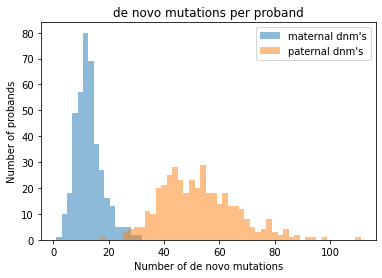

In [41]:
mat_data = df.loc[:, 'mat_dnm']
pat_data = df.loc[:, 'pat_dnm']

# Algorithm for setting width found on
# https://www.kite.com/python/answers/how-to-set-the-bin-size-of-a-matplotlib-histogram-in-python
width = 2
mat_bins = int(np.ceil((mat_data.max() - mat_data.min()) / width))
pat_bins = int(np.ceil((pat_data.max() - pat_data.min()) / width))

fig, ax = plt.subplots()
ax.hist(mat_data, bins=mat_bins, alpha=0.5, label="maternal dnm's")
ax.hist(pat_data, bins=pat_bins, alpha=0.5, label="paternal dnm's")
plt.legend()
ax.set_title('de novo mutations per proband')
ax.set_xlabel('Number of de novo mutations')
ax.set_ylabel('Number of probands')
plt.show()

## T-test (part 9)
According to the below t-test, the difference between the number of maternally and paternally inherited dnm's is significantly different (p = 2.1986e-264). On average, there are 53.4 less maternally inherited dnm's than paternally inherited ones.

In [13]:
# Making new dataframe so that ols can categorically define
# the different dnm counts
df_ori_pat = pd.DataFrame(df.loc[:, 'pat_dnm'])
df_ori_pat['origin'] = 'pat'
df_ori_pat = df_ori_pat.rename(columns={'pat_dnm': 'dnm'})

df_ori_mat = pd.DataFrame(df.loc[:, 'mat_dnm'])
df_ori_mat['origin'] = 'mat'
df_ori_mat = df_ori_mat.rename(columns={'mat_dnm': 'dnm'})


df_ori = df_ori_pat.append(df_ori_mat)
df_ori

,dnm,origin
Proband_id,,
675,51,pat
1097,26,pat
1230,42,pat
1481,53,pat
1806,61,pat
...,...,...
153657,8,mat
154565,14,mat
154621,11,mat


In [14]:
#stats.ttest_ind(df.loc[:, 'mat_dnm'], df.loc[:, 'pat_dnm'])

model = smf.ols(formula="dnm ~ 1 + origin", data=df_ori)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dnm   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2852.
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          2.20e-264
Time:                        11:07:44   Log-Likelihood:                -2972.8
No. Observations:                 792   AIC:                             5950.
Df Residuals:                     790   BIC:                             5959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.7803      0.520     24.601      0.000      11.761      13.800
origin[T.pat]    39.2348      0.735     53.404      0.000      37.793      40.677
==============================================================================
Omnibus:                      133.813   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.697
Skew:                           0.850   Prob(JB):                     4.32e-82
Kurtosis:                       5.910   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
results.pvalues

Intercept         1.156747e-99
origin[T.pat]    2.198603e-264
dtype: float64

## Poisson regressions (part 10)

### Maternal

In [16]:
model = smf.poisson(formula="mat_dnm ~ 1 + Mother_age", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                 0.07164
Time:                        11:07:44   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [17]:
results.pvalues

Intercept     6.989401e-188
Mother_age     5.133524e-42
dtype: float64

### Paternal

In [18]:
model = smf.poisson(formula="pat_dnm ~ 1 + Father_age", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.2277
Time:                        11:07:44   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [19]:
results.pvalues

Intercept      0.000000e+00
Father_age    1.169940e-192
dtype: float64

### Maternal v Paternal

In [20]:
model = smf.poisson(formula="dnm ~ 1 + origin", data=df_ori)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.893765
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                    dnm   No. Observations:                  792
Model:                        Poisson   Df Residuals:                      790
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.6206
Time:                        11:07:44   Log-Likelihood:                -3083.9
converged:                       True   LL-Null:                       -8128.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5479      0.014    181.260      0.000       2.520       2.575
origin[T.pat]     1.4036      0.016     89.467      0.000       1.373       1.434
=================================================================================
"""

In [21]:
results.pvalues

Intercept        0.0
origin[T.pat]    0.0
dtype: float64

## Predicting dnm's (part 11)
According to the below prediction, a 50.5 year old father will pass on about 82 de novo mutations on average.

In [22]:
# We need the paternal model. Rewrote here
model = model = smf.poisson(formula="pat_dnm ~ 1 + Father_age", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.2277
Time:                        11:07:44   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [23]:
np.exp(3.1903 + 50.5 * 0.0241)

82.05173803957092

In [24]:
new_observation = pd.DataFrame({'Father_age': [50.5]})
results.predict(new_observation)

0    82.031316
dtype: float64